In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
categories = pd.read_excel("../Sheets/leetcode_broad_categories.xlsx")

In [3]:
task_names=pd.read_excel("../Sheets/tasks_and_approaches.xlsx")

In [4]:
task_names

,Number,Programming task,\textbf{Java Human Approach},\textbf{Java GPT Approach},\textbf{Python Human Approach},\textbf{Python GPT Approach}
0,3008,Find Beautiful Indices in the Given Array II,Knuth–Morris–Pratt algorithm,Two-Pointer,Knuth–Morris–Pratt algorithm and Two-Pointer,Two-Pointer
1,3213,Construct String with Minimum Cost,Dynamic Programming and Trie,Dynamic Programming,Dynamic Programming and Trie,Dynamic Programming
2,3123,Find Edges in Shortest Paths,Dijkstra Algorithm and Set,Dijkstra Algorithm,Dijkstra Algorithm,Dijkstra Algorithm
3,3303,Find the Occurrence of First Almost Equal Subs...,Z-algorithm,Sliding Window,Z-algorithm,Sliding Window
4,41,First Missing Positive,In-place index mapping,In-place index mapping,In-place hashing,In-place hashing
5,3307,Find the K-th Character in String Game II,Custom for loop,Customs for loop,Custom for loop,Custom for loop
6,3260,Find the Largest Palindrome Divisible by K,Custom if statements,Custom for loop,Custom if statements,Custom for loop
7,84,Largest Rectangle in Histogram,Dynamic Programming,Stack,Stack,Stack
8,3288,Length of the Longest Increasing Path,Binary Search,Dynamic Programming,Binary Search,Dynamic Programming and Binary Search
9,3093,Longest Common Suffix Queries,Trie and DFS,Custom for loop,Trie and DFS,Custom for loop


In [5]:
list_categories={}
for category in categories["Broad Category"]:
    list_categories[category]=[]
    numbers_str=categories[categories["Broad Category"]==category]["Problem Numbers"].to_list()[0].replace("[","").replace("]", "").split(",")
    for number in numbers_str:
        list_categories[category].append(task_names[task_names["Number"]==int(number)]["Programming task"].to_list()[0].replace(" ", "_"))

In [6]:
list_categories["Heuristic Methods"]

['Wildcard_Matching',
 'Minimize_OR_of_Remaining_Elements_Using_Operations',
 'Find_the_Maximum_Sum_of_Node_Values',
 'Minimum_Cost_for_Cutting_Cake_II',
 'Shortest_Distance_After_Road_Addition_Queries_II',
 'Find_the_Largest_Palindrome_Divisible_by_K',
 'Minimum_Amount_of_Damage_Dealt_to_Bob']

In [7]:
print([len(list_categories[x] ) for x in list_categories.keys()])
print(list_categories.keys())

[3, 7, 12, 11, 19, 6, 20, 18]
dict_keys(['Graph Theory', 'Heuristic Methods', 'Mathematical Techniques', 'Recursive Techniques', 'Search Strategies', 'Sorting Techniques', 'Data Structures', 'Optimization Techniques'])


In [8]:
with open('../Results/resultsPython.json') as json_file:
    dataPython = json.load(json_file)

In [10]:
category_mean_Python={"o1":[], "4o":[], "copilot":[]}
for category in list_categories.keys():
    for model in category_mean_Python.keys():
        temp=[]
        for task in list_categories[category]:
            if np.mean(dataPython[task][model]["Energy Linux"])>12:
                U1, p = mannwhitneyu(dataPython[task]["human"]["Energy Linux"], dataPython[task][model]["Energy Linux"], method="exact")
                if p<0.0001:
                    temp.append(np.mean([yi-xi for xi, yi in zip(dataPython[task]["human"]["Energy Linux"], dataPython[task][model]["Energy Linux"])]).item())
        if len(temp)<0:
            temp=[0]
        category_mean_Python[model].append(np.mean(temp).item())

/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
df = pd.DataFrame(data=category_mean_Python)
df

,o1,4o,copilot
0,139.888000,NaN,NaN
1,22.105667,263.824000,264.303250
2,171.391167,62.919600,134.868000
3,-20.905375,-21.787556,-21.803571
4,-87.971923,-111.840000,-92.390417
5,-1.229000,59.098000,54.870500
6,35.805000,28.216200,32.486333
7,60.555071,-88.131900,-16.379455


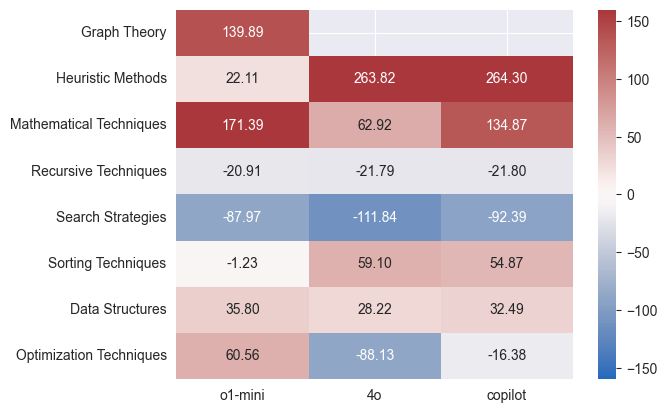

In [13]:
svm=sns.heatmap(data=df, annot=True, fmt=".2f", cmap="vlag", vmax=160, vmin=-160, yticklabels=list(list_categories.keys()), xticklabels=["o1-mini","4o", "copilot"])
figure = svm.get_figure()    
figure.savefig('./Heatmaps/mean_diff_categories_Python.png', dpi=300, bbox_inches='tight')

In [14]:
with open('../Results/resultsJava.json') as json_file:
    dataJava = json.load(json_file)

In [15]:
category_mean_Java={"o1":[], "4o":[], "copilot":[]}
for category in list_categories.keys():
    for model in category_mean_Java.keys():
        temp=[]
        for task in list_categories[category]:
            if task=="Find_the_K-th_Character_in_String_Game_II":
                task="Find_the_Kth_Character_in_String_Game_II"
            if task=="N-Queens":
                task="NQueens"
            if task=="N-Queens_II":
                task="NQueens_II"
            if task=="Maximum_Sum_of_Subsequence_With_Non-adjacent_Elements":
                task="Maximum_Sum_of_Subsequence_With_Non_adjacent_Elements"
            if task=="Reverse_Nodes_in_k-Group":
                task="Reverse_Nodes_in_kGroup"
            if task=="Count_Substrings_That_Satisfy_K-Constraint_II":
                task="Count_Substrings_That_Satisfy_KConstraint_II"
            if np.mean(dataJava[task][model]["Energy Linux"])>12:
                U1, p = mannwhitneyu(dataJava[task]["human"]["Energy Linux"], dataJava[task][model]["Energy Linux"], method="exact")
                if p<0.0001:
                    temp.append(np.mean([yi-xi for xi, yi in zip(dataJava[task]["human"]["Energy Linux"], dataJava[task][model]["Energy Linux"])]).item())
        if len(temp)<0:
            temp=[0]
        category_mean_Java[model].append(np.mean(temp).item())

/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [16]:
dfJava = pd.DataFrame(data=category_mean_Java)
dfJava

,o1,4o,copilot
0,-65.967727,-41.250909,NaN
1,39.785455,119.998788,-4.430000
2,-0.984394,2.882045,-54.448727
3,-28.279318,-29.322424,-23.123182
4,20.085207,36.197922,17.504747
5,6.591818,-20.833182,NaN
6,-0.270101,28.896263,-3.576000
7,6.465568,-52.400000,-44.550114


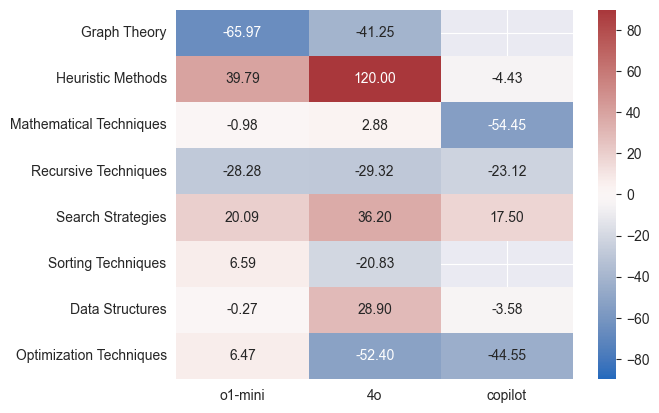

In [17]:
svmJava=sns.heatmap(data=dfJava, annot=True, fmt=".2f",vmax=90, vmin=-90, cmap="vlag", yticklabels=list(list_categories.keys()), xticklabels=["o1-mini","4o", "copilot"])
figureJava = svmJava.get_figure()    
figureJava.savefig('./Heatmaps/mean_diff_categories_Java.png', dpi=300, bbox_inches='tight')

In [18]:
with open('../Results/resultsC.json') as json_file:
    dataC = json.load(json_file)

In [19]:
category_mean_C={"o1":[], "4o":[], "copilot":[]}
for category in list_categories.keys():
    for model in category_mean_C.keys():
        temp=[]
        for task in list_categories[category]:
            if np.mean(dataC[task][model]["Energy Linux"])>12:
                U1, p = mannwhitneyu(dataC[task]["human"]["Energy Linux"], dataC[task][model]["Energy Linux"], method="exact")
                if p<0.0001:
                    temp.append(np.mean([yi-xi for xi, yi in zip(dataC[task]["human"]["Energy Linux"], dataC[task][model]["Energy Linux"])]).item())
        if len(temp)<0:
            temp=[0]
        category_mean_C[model].append(np.mean(temp).item())

/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [20]:
dfC = pd.DataFrame(data=category_mean_C)
dfC

,o1,4o,copilot
0,15.903500,6.230000,NaN
1,5.194333,40.612000,-7.518000
2,11.168500,-31.082500,14.870500
3,67.365222,10.880600,71.768600
4,55.462875,17.780375,20.538400
5,7.869000,28.885667,6.655000
6,47.558000,39.564667,41.891333
7,65.865000,48.097500,95.434400


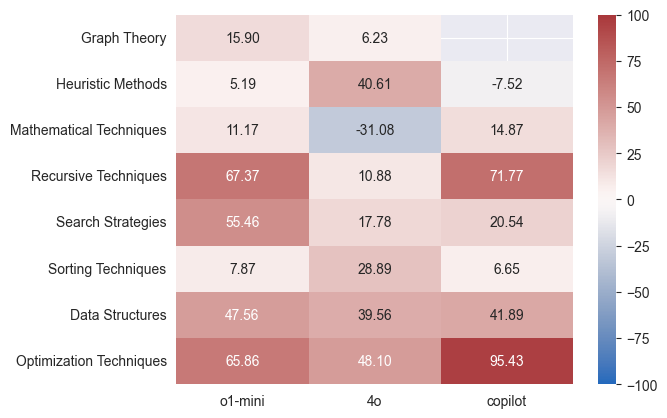

In [21]:
svmC=sns.heatmap(data=dfC, annot=True, fmt=".2f", vmax=100, vmin=-100,cmap="vlag", yticklabels=list(list_categories.keys()), xticklabels=["o1-mini","4o", "copilot"])
figureC = svmC.get_figure()    
figureC.savefig('./Heatmaps/mean_diff_categories_C.png', dpi=300, bbox_inches='tight')

In [23]:
import math

categories_mean={"o1":[], "4o":[], "copilot":[]}
for category in categories_mean.keys():
    P = [0 if math.isnan(x) else x for x in category_mean_Python[category]]
    J = [0 if math.isnan(x) else x for x in category_mean_Java[category]]
    C = [0 if math.isnan(x) else x for x in category_mean_C[category]]
    result=[x+y for x,y in zip(P,J)]
    result=[x+y for x,y in zip(C,result)]
    result=[x/3 for x in result]
    categories_mean[category]=result

In [24]:
dfAll = pd.DataFrame(data=categories_mean)
dfAll.replace(0, np.nan, inplace=True)

In [25]:
dfAll

,o1,4o,copilot
0,29.941258,-11.673636,NaN
1,22.361818,141.478263,84.118417
2,60.525091,11.573048,31.763258
3,6.060176,-13.409793,8.947282
4,-4.141280,-19.287234,-18.115756
5,4.410606,22.383495,20.508500
6,27.697633,32.225710,23.600556
7,44.295213,-30.811467,11.501611


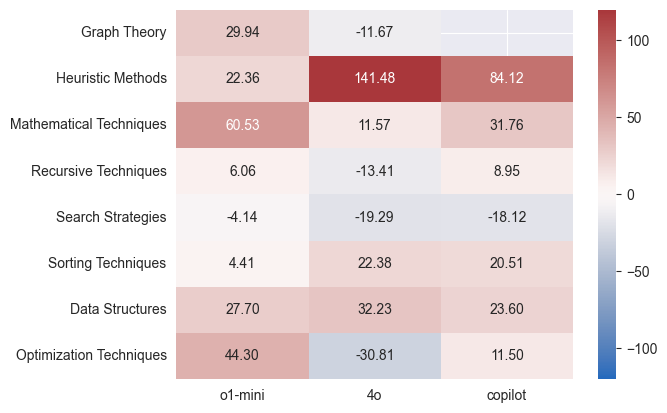

In [26]:
svmAll=sns.heatmap(data=dfAll, annot=True, fmt=".2f", cmap="vlag", vmax=120, vmin=-120, yticklabels=list(list_categories.keys()), xticklabels=["o1-mini","4o", "copilot"])
figureAll = svmAll.get_figure()    
figureAll.savefig('./Heatmaps/energy_consumption_tasks_all_lan.png', dpi=300, bbox_inches='tight')

In [31]:
df

,o1,4o,copilot
0,139.888000,NaN,NaN
1,22.105667,263.824000,264.303250
2,171.391167,62.919600,134.868000
3,-20.905375,-21.787556,-21.803571
4,-87.971923,-111.840000,-92.390417
5,-1.229000,59.098000,54.870500
6,35.805000,28.216200,32.486333
7,60.555071,-88.131900,-16.379455


In [27]:
df.rename(columns={'o1': "o1-mini_Python", "4o": "4o_Python", "copilot": "copilot_Python"},inplace=True)
dfJava.rename(columns={'o1': "o1-mini_Java", "4o": "4o_Java", "copilot": "copilot_Java"},inplace=True)
dfC.rename(columns={'o1': "o1-mini_C++", "4o": "4o_C++", "copilot": "copilot_C++"},inplace=True)
df_concat = pd.concat([df, dfJava], axis=1 )
df_concat=pd.concat([df_concat, dfC], axis=1)

In [28]:
df_concat

,o1-mini_Python,4o_Python,copilot_Python,o1-mini_Java,4o_Java,copilot_Java,o1-mini_C++,4o_C++,copilot_C++
0,139.888000,NaN,NaN,-65.967727,-41.250909,NaN,15.903500,6.230000,NaN
1,22.105667,263.824000,264.303250,39.785455,119.998788,-4.430000,5.194333,40.612000,-7.518000
2,171.391167,62.919600,134.868000,-0.984394,2.882045,-54.448727,11.168500,-31.082500,14.870500
3,-20.905375,-21.787556,-21.803571,-28.279318,-29.322424,-23.123182,67.365222,10.880600,71.768600
4,-87.971923,-111.840000,-92.390417,20.085207,36.197922,17.504747,55.462875,17.780375,20.538400
5,-1.229000,59.098000,54.870500,6.591818,-20.833182,NaN,7.869000,28.885667,6.655000
6,35.805000,28.216200,32.486333,-0.270101,28.896263,-3.576000,47.558000,39.564667,41.891333
7,60.555071,-88.131900,-16.379455,6.465568,-52.400000,-44.550114,65.865000,48.097500,95.434400


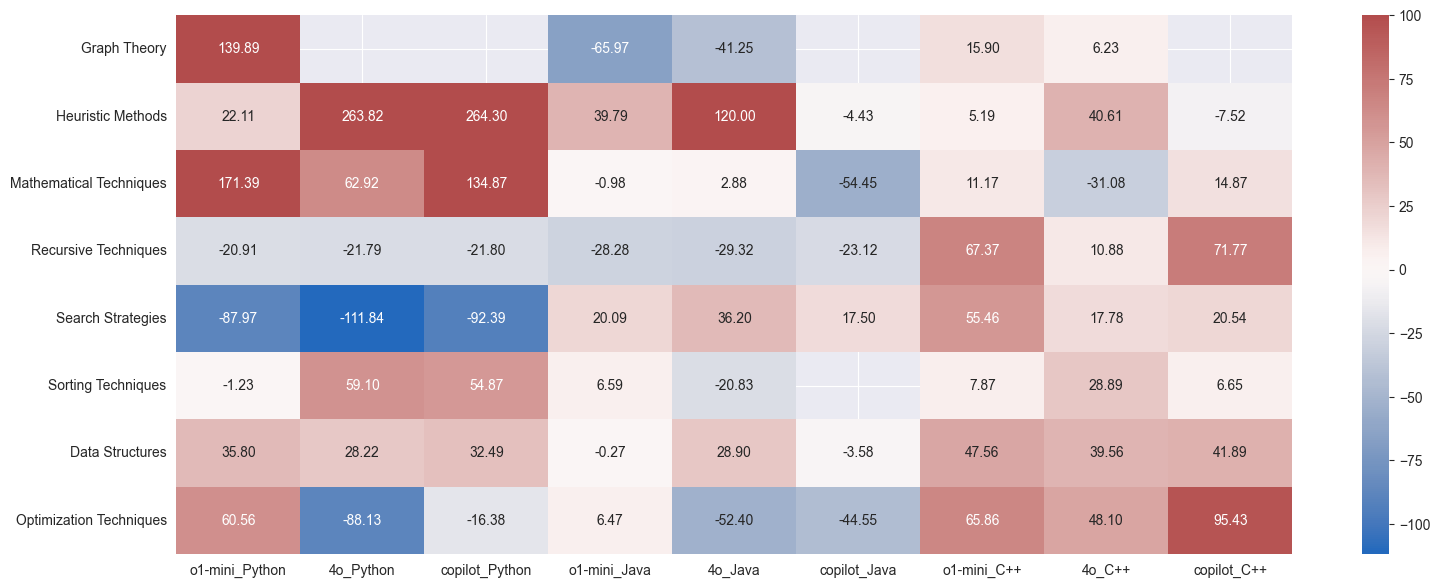

In [31]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(18,7))  
svmThree=sns.heatmap(data=df_concat, annot=True, fmt=".2f", cmap="vlag", vmax=100, yticklabels=list(list_categories.keys()), ax=ax, center=0)
fig.savefig('./Heatmaps/energy_consumption_tasks_big_table.png', dpi=400, bbox_inches='tight')